# **Generating New Text with N-grams** 

In [ ]:
!pip3 install nltk

In [ ]:
#packages required to implement n-grams

import nltk
import re
import random

nltk.download('punkt') #downloading english languate puntuations
from nltk.tokenize import sent_tokenize,word_tokenize



In [ ]:
def read_and_tokenize_sentences(filename):
    file = open(filename,encoding="unicode_escape")
    data = file.read()
    data = data.replace("\n"," ")
 
    #close file
    file.close()
 
    return(sent_tokenize(data))


In [ ]:
def generate_ngrams(sentence_list, n):
    n_grams = []
    total_tokens = []
    for s in sentence_list:
        
        # Convert to lowercases
        s = s.lower()
        # Replace all none alphanumeric characters with spaces
        s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
      
        # Break sentence in the token, remove empty tokens
        tokens = [token for token in s.split(" ") if token != ""]
        total_tokens.extend(tokens)
        # Use the zip function to help us generate n-grams
        # Concatentate the tokens into ngrams and return
        ngram = zip(*[tokens[i:] for i in range(n)])
        n_grams.extend([" ".join(n_gram) for n_gram in ngram])
    return n_grams, set(total_tokens)

In [ ]:
# tokenizing the sentences from entire text using nltk sentence tokenizer
sentence_list = read_and_tokenize_sentences("Titanic.txt")

# creating the bi_gram and tri grams from the sentences
bi_gram, vocabulary = generate_ngrams(sentence_list,2)
tri_gram,_ = generate_ngrams(sentence_list,3)

In [ ]:
# counting the frequencies of bi and tri gramns
bi_gram_count = {x:bi_gram.count(x) for x in bi_gram}
tri_gram_count = {x:tri_gram.count(x) for x in tri_gram}

In [ ]:
def suggest_next_word(input_,bigram_count,trigram_count,vocabulary,no_of_probabilities):
    """
    This function will calcute the probabilities of words in vocabulary given input bi-gram
    The probability is zero if given bigram is not in corpus
    
    no_of_probabilities = how many top suggestions need to retrive from vocabulary
    
    """
    
    word_tokens = word_tokenize(input_.lower())
    last_bigram = word_tokens[-2:]

    vocab_probabilities ={}
    for vocab_word in vocabulary:
        test_trigram  = last_bigram[0] + " " + last_bigram[1] + " " +vocab_word
        test_bigram = last_bigram[0] + " " + last_bigram[1]

        if(test_trigram in trigram_count):
            test_trigram_count = trigram_count[test_trigram]
        else:
            test_trigram_count = 0
        if(test_bigram in bigram_count):

            test_bigram_count = bigram_count[test_bigram]
        else:
            test_bigram_count = 0

        if(test_bigram_count !=0):
            probability = test_trigram_count/test_bigram_count
        else:
            probability = 0

        vocab_probabilities[vocab_word] = probability
    top_suggestions = sorted(vocab_probabilities.items(),key = lambda x:x[1],reverse=True)[:no_of_probabilities]
    return top_suggestions

In [ ]:
suggest_next_word("hello how are",bi_gram_count,tri_gram_count,vocabulary,6)

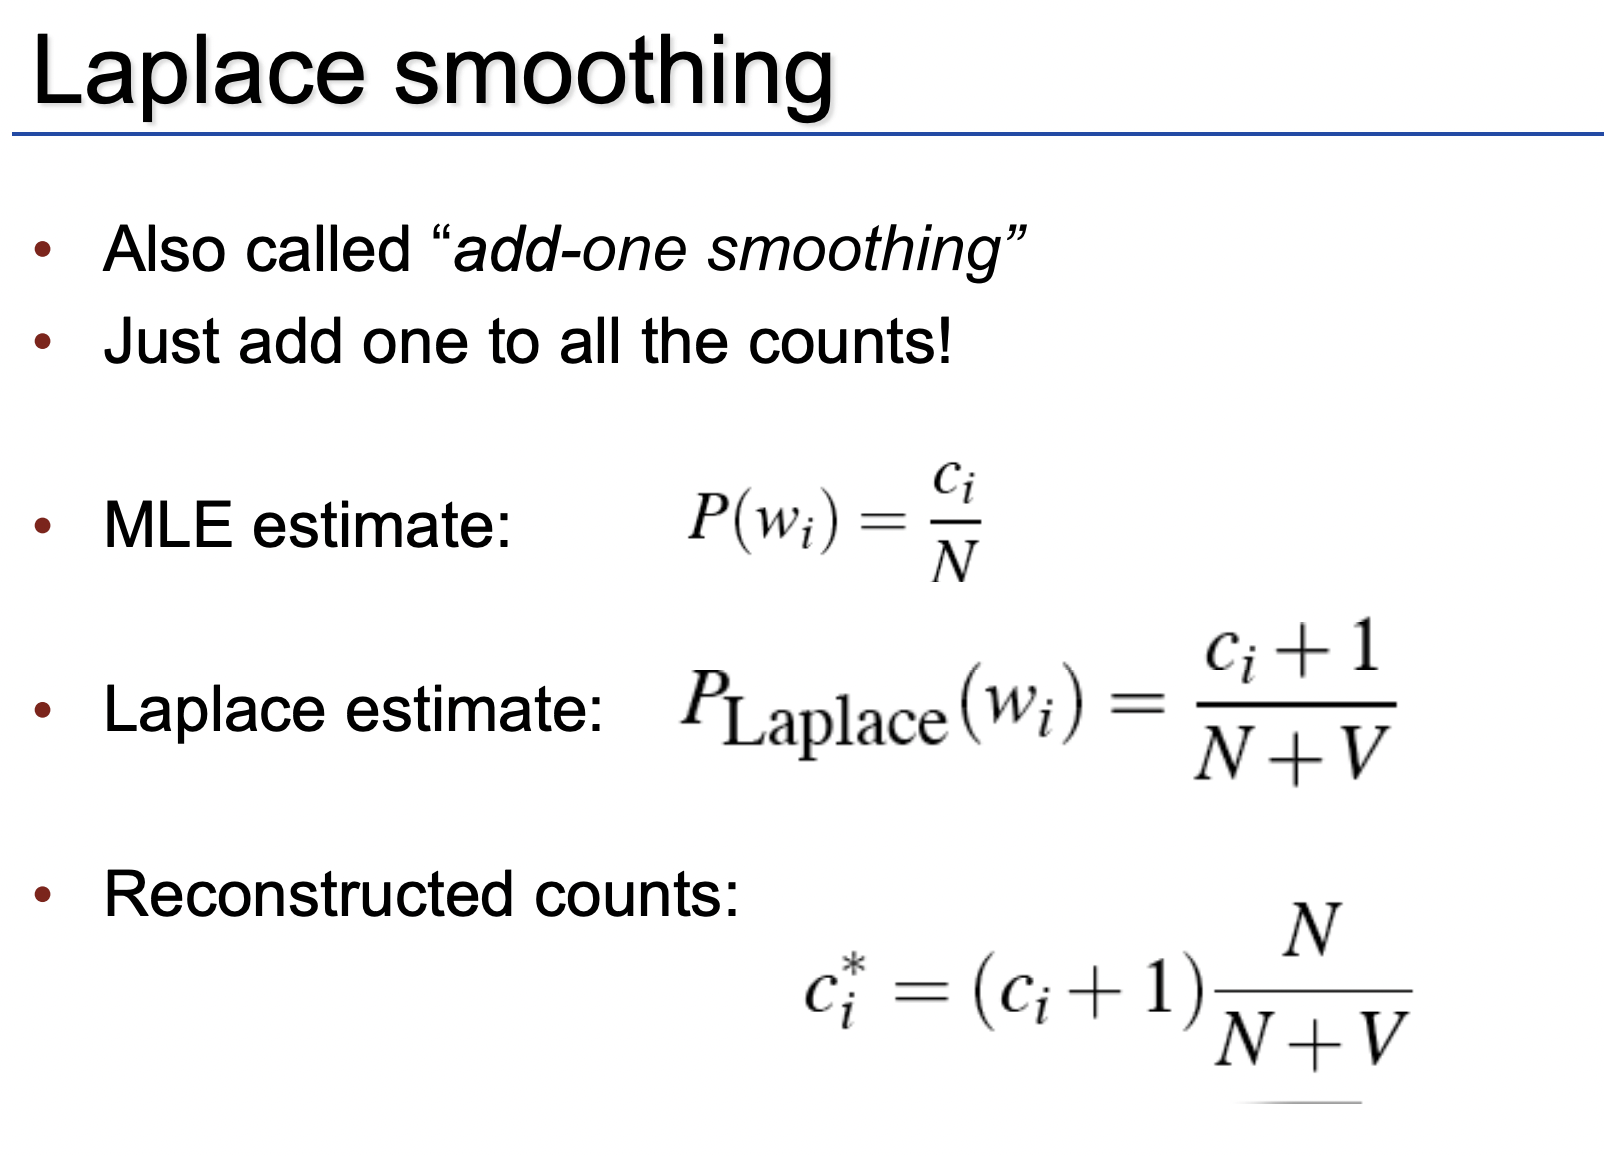

## In the above laplacian smoothing V is vocabulary size

## Task to convert the given n-gram model to laplacian smoothing and generate text of 50 words.

## While gerating the text if the output probability of words are same then randomly choose a word using(random.choice) and continue the generation.

In [ ]:
def suggest_next_word_laplacian(input_,bigram_count,trigram_count,vocabulary,no_of_probabilities):
    """
    This function will calcute the probabilities using laplacian of words in vocabulary given input bi-gram
    
    no_of_probabilities = how many top suggestions need to retrive from vocabulary
    
    """
    word_tokens = word_tokenize(input_.lower())
    last_bigram = word_tokens[-2:]

    vocab_probabilities ={}
    for vocab_word in vocabulary:
        test_trigram  = last_bigram[0] + " " + last_bigram[1] + " " +vocab_word
        test_bigram = last_bigram[0] + " " + last_bigram[1]

        if(test_trigram in trigram_count):
            test_trigram_count = trigram_count[test_trigram]
        else:
            test_trigram_count = 0

        if(test_bigram in bigram_count):

            test_bigram_count = bigram_count[test_bigram] 
        else: 
            test_bigram_count = 0 

        updated_count = None # change the code implement using formula provided above 
        probability = None # Change the code


        vocab_probabilities[vocab_word] = probability
        
    top_suggestions = sorted(vocab_probabilities.items(),key = lambda x:x[1],reverse=True)[:no_of_probabilities]
    
    if(top_suggestions[0][1]!=top_suggestions[1][1]):
    
        return top_suggestions[0][0]
    else:
        print("the given n-gram is not in the corpus")
        return random.choice(None)# change the code ... try to select the words from the vocabulary

In [ ]:
suggest_next_word_laplacian("hello how are",bi_gram_count,tri_gram_count,vocabulary,6)

In [ ]:
def generate_text(bigram_count,trigram_count,vocabulary,word_count):
    """
    This function will generate the new text 
    
    word_count =. no of words need to generate 
    """
    words = []

    next_word = random.choice(list(bigram_count.keys())) # selecting the bigram randomly
    word_tokens = word_tokenize(next_word)
    words.extend(word_tokens)
    for i in range(word_count):
        next_word = next_word + " " + suggest_next_word_laplacian(next_word,bigram_count,trigram_count,vocabulary,6)
    
    return(next_word)

## Let's generate Titanic story !!!

In [ ]:
generate_text(bi_gram_count,tri_gram_count,vocabulary,60)

## Comment about the coherence of generated text and give the reasoning?

## Try to increase the n-gram size and generate the text and comment about coherence of generated text?

## Note consider N>7 for above task.